In [3]:
library(astsa)
library(forecast)
library(FitAR)
library(Metrics)

df <- read.csv("projectdata_covid.csv")

# Spectral Density and Periodigram

In [12]:
localMaxima <- function(x) {
    'Find indecies of local maxima of a sequential list. 

    Parameters
    ----------
    first: list of floats
        sequential y-vals of curve

    Returns
    -------
    list
        indecies of local maxima
    '
    
    y <- diff(c(-Inf, x)) > 0L
    rle(y)$lengths
    y <- cumsum(rle(y)$lengths)
    y <- y[seq.int(1L, length(y), 2L)]
    if (x[[1]] == x[[2]]) {
        y <- y[-1]
    }
    y
}

pgram <- function(x){
    'Discrete periodigram for a time series via FFT. 
    index/length(x) gives the sinusoid frequencies 
    from the fourier frequencies. 

    Parameters
    ----------
    first: list of floats
        time series

    Returns
    -------
    list
        periodigram of time series and list of periodigram values.
    '
    m = floor(length(x)/2)
    pgram = abs(fft(x)[2:(m+1)])^2/length(x)
    plot(pgram, type = "h")
    abline(h=0)
    return(pgram)
}

specMax <- function(x) {
    'Compute the spectral density of a time series x. 
    Return frequencies of spectral maxima in descending order.
    Recall that spectral frequencies are the same as sinusoid frequencies. 

    Parameters
    ----------
    first: list of floats
        time series data

    Returns
    -------
    list
        frequencies of spectral maxima
    '

    s <- mvspec(x)
    maxs.index <- localMaxima(s$spec)  # find indecies of local maxima
    maxs <- s$freq[maxs.index]  # frequency values of local maxima
    maxs.val <- s$spec[maxs.index]  # spec values of local maxima
    
    rv <- maxs[order(-maxs.val)]  # put maxs in decreasing order
    
    return(rv)
}

## Duality between Spectral Density and Periodigram

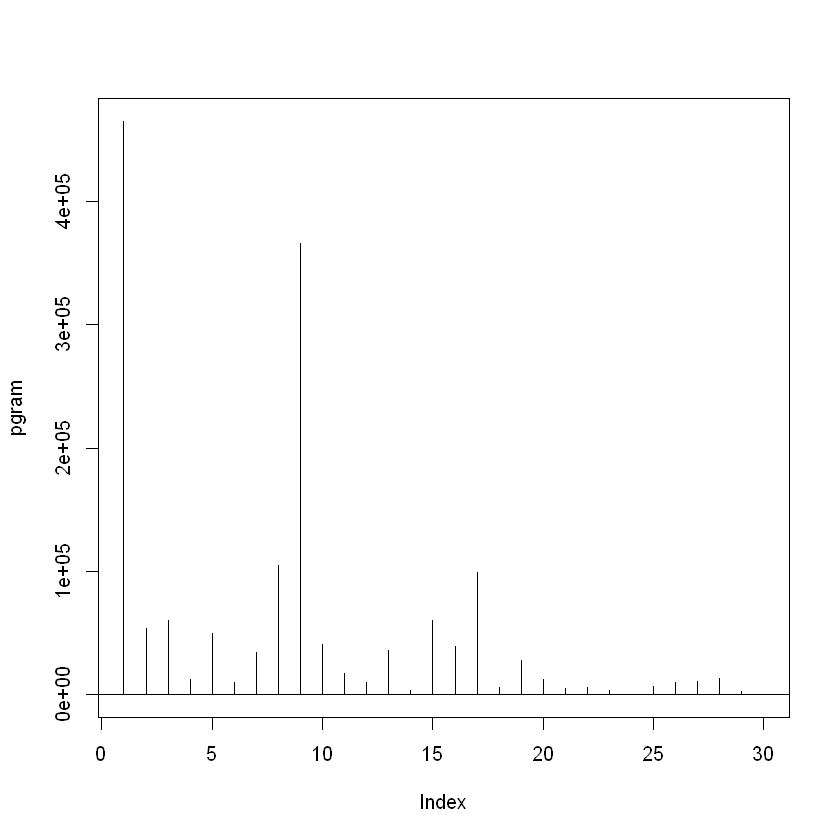

[1] 0.01666667 0.15000000 0.28333333 0.25000000 0.05000000 0.08333333
 [7] 0.21666667 0.31666667 0.46666667 0.36666667

[1] 0.15000000 0.01666667 0.08333333 0.28333333 0.25000000 0.05000000
 [7] 0.31666667 0.21666667 0.45000000 0.36666667

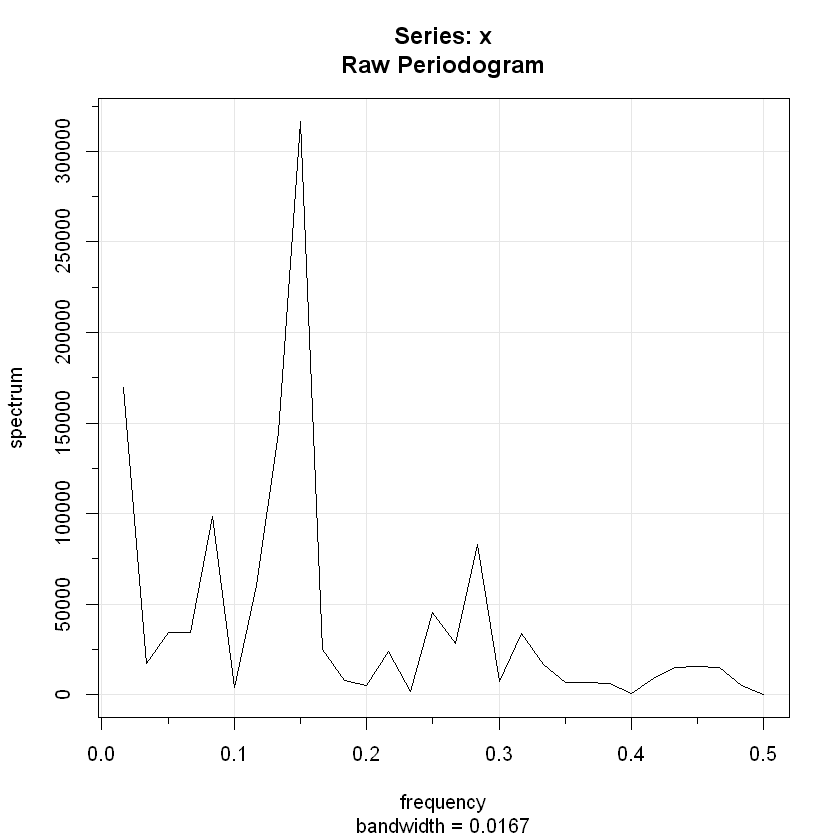

In [23]:
# Duality between spectral density and periodigram
Y.fromPeriod <- pgram(df$New.Cases)
maxFreqs.fromSpec <- specMax(df$New.Cases)

l <- length(df$New.Cases)
maxFreqs.fromPeriod <- localMaxima(Y.fromPeriod)
maxY.fromPeriod <- Y.fromPeriod[maxsIndex.fromPeriod]
maxFreqs.fromPeriod <- maxFreqs.fromPeriod[order(-maxY.fromPeriod)]/l

maxFreqs.fromPeriod
maxFreqs.fromSpec

Overlap between the largest spike in the spectral and periodigram domains